In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('../train_data_hand-gestures.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X.shape ,y.shape

((27455, 784), (27455,))

In [2]:
df_test = pd.read_csv('../test_data_hand-gestures.csv')
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
X_test.shape ,y_test.shape

((7172, 784), (7172,))

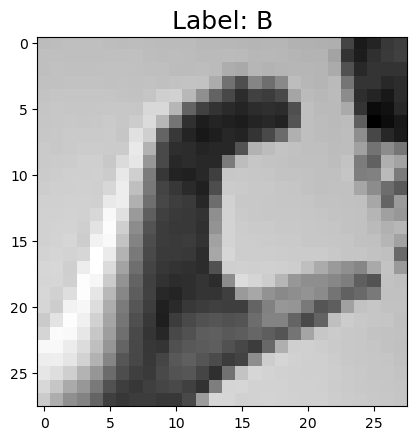

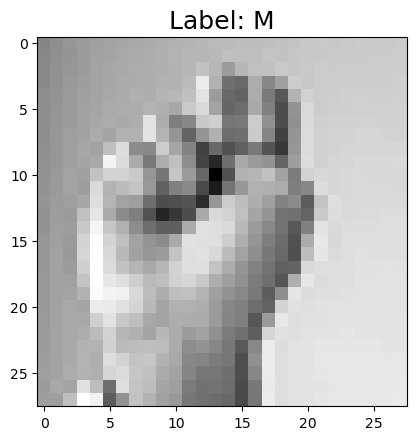

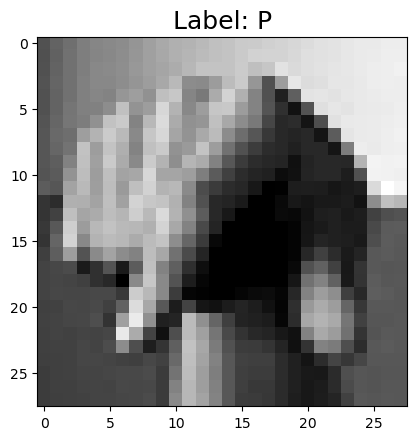

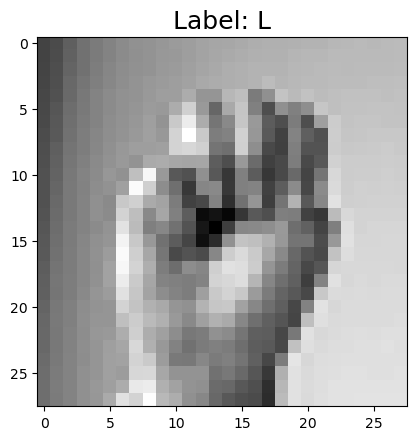

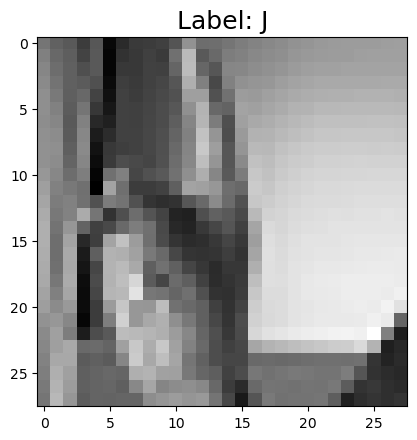

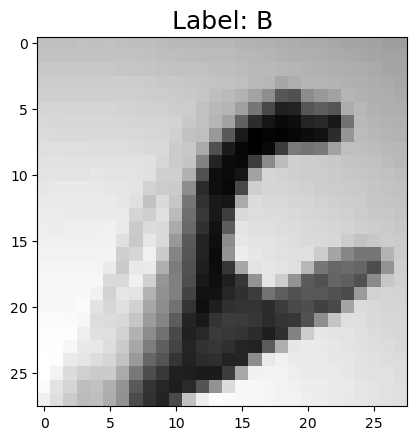

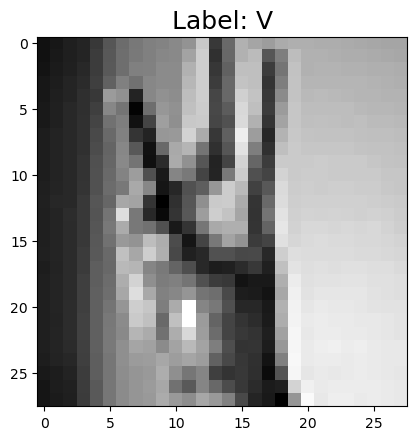

In [3]:
import random
random_samples = df.sample(n=7, random_state=1)

labels = random_samples.iloc[:, 0].values
pixels = random_samples.iloc[:, 1:].values

pixels = pixels / 255.0
images = pixels.reshape((7, 28, 28))

for i in range(7):
    plt.figure()
    l = chr(ord('A') + labels[i] - 1)
    plt.title(f'Label: {l}', fontdict={'fontsize':18})
    plt.imshow(images[i], cmap='gray')
    plt.savefig(f'Sample{i+1}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split

num_classes = len(np.unique(y))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

#y_train = y_train.astype('int')
#y_val = y_val.astype('int')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,673 (2.06 MB)

 Trainable params: 539,673 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0443 - loss: 26.7821 - val_accuracy: 0.0399 - val_loss: 3.1795
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0410 - loss: 3.1842 - val_accuracy: 0.0488 - val_loss: 3.1861
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0437 - loss: 3.1833 - val_accuracy: 0.0530 - val_loss: 3.1795
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0428 - loss: 3.1838 - val_accuracy: 0.0419 - val_loss: 3.1793
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0459 - loss: 3.1822 - val_accuracy: 0.0399 - val_loss: 3.1832
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0459 - loss: 3.1819 - val_accuracy: 0.0399 - val_loss: 3.1826
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0443 - loss: 3.1831 - val_accuracy: 0.0419 - val_loss: 3.1907
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0439 - loss: 3.1833 - val_accuracy: 0

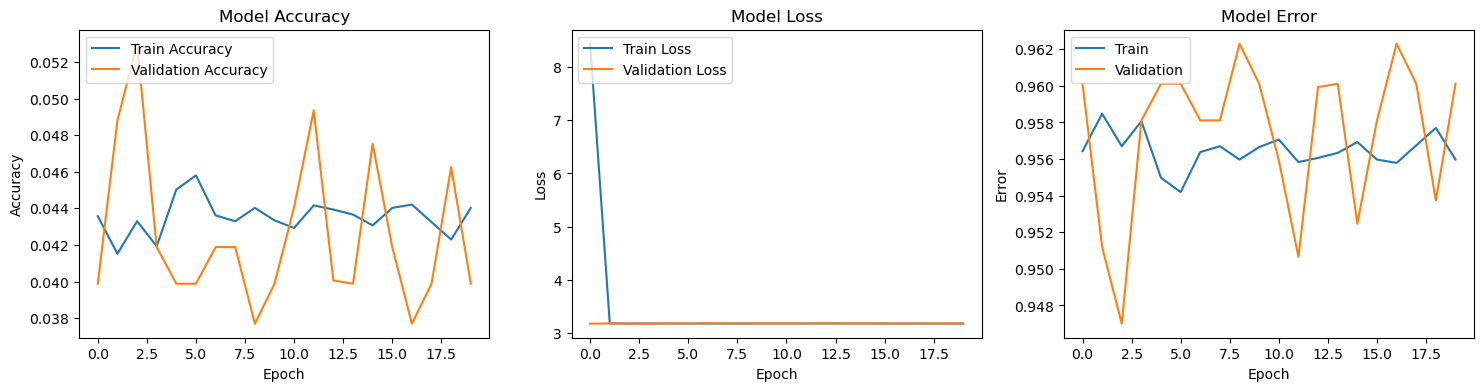

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0365 - loss: 3.8755
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 640x480 with 0 Axes>

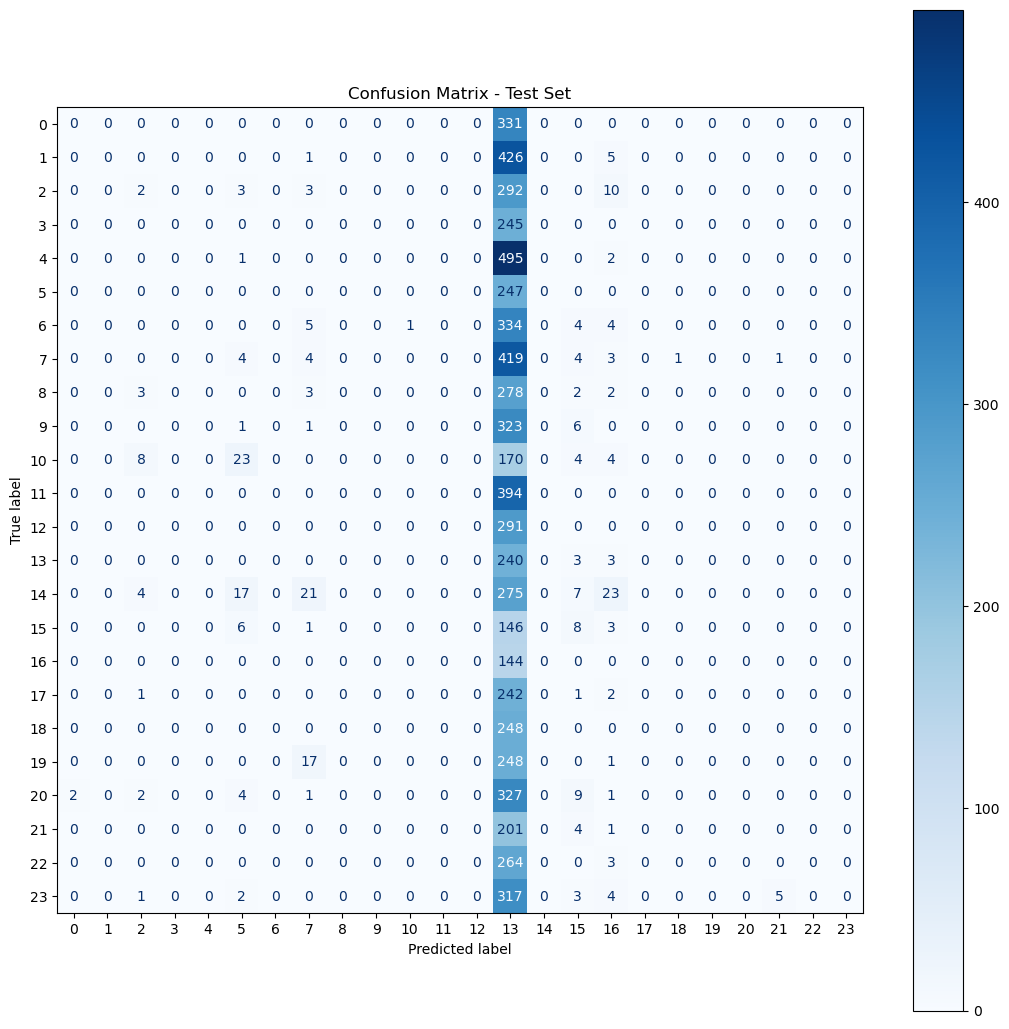

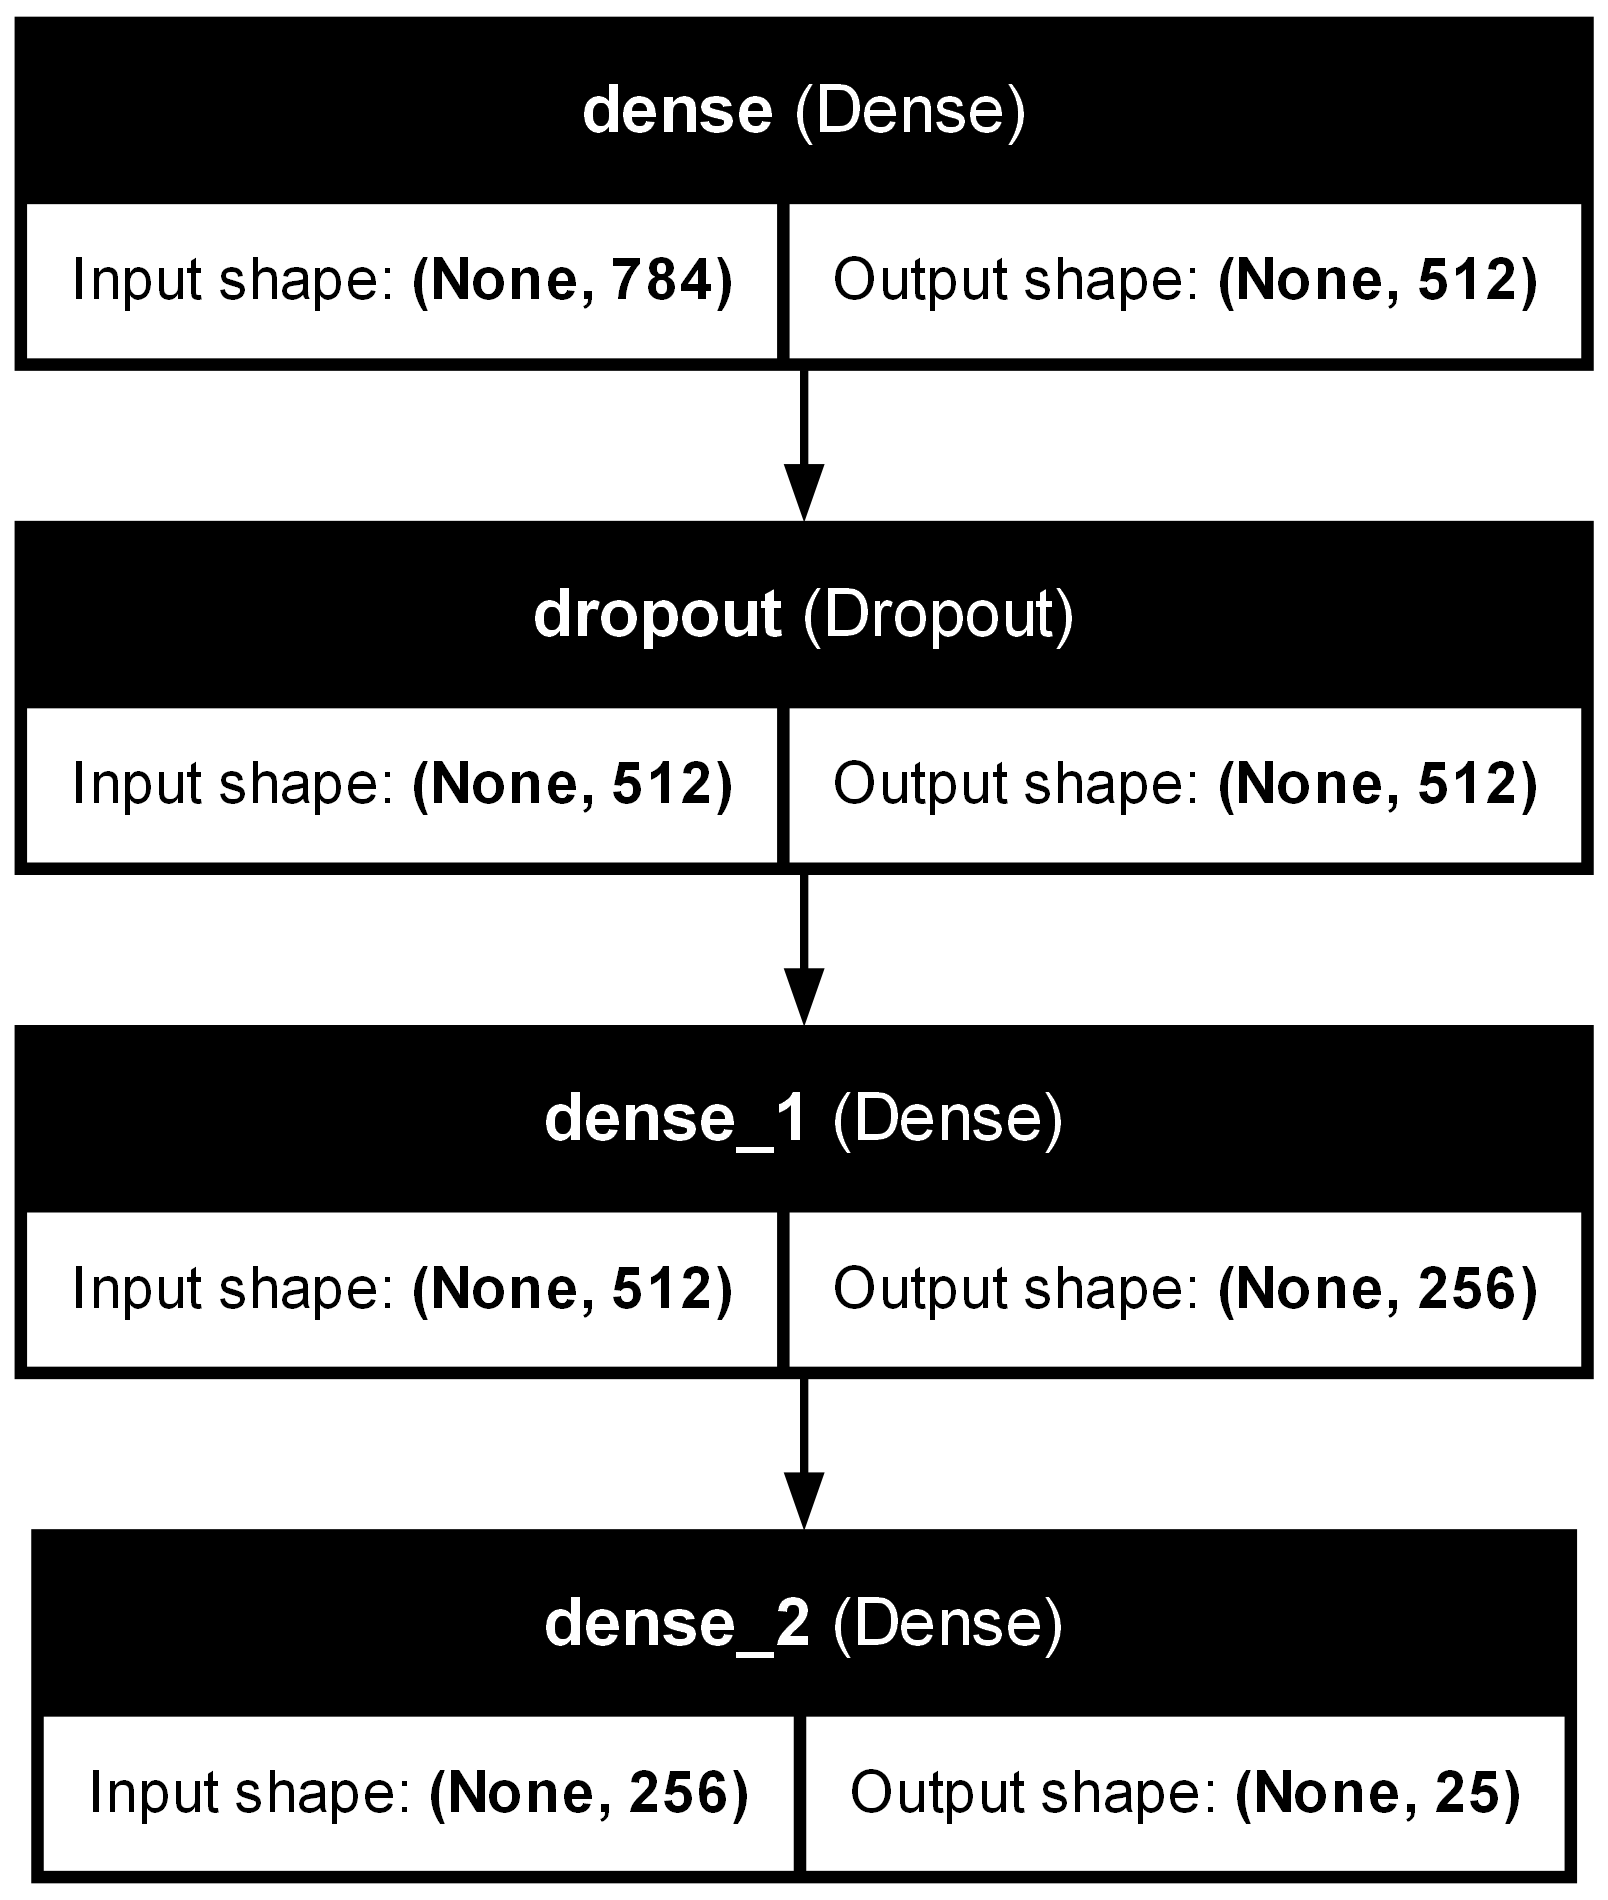

In [5]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes+1, activation='softmax'))
model.compile(optimizer=SGD(learning_rate=0.9) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))
val_loss, val_accuracy = model.evaluate(X_val, y_val)
#print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

plt.figure(figsize=(18, 4))
    
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

train_error = 1 - np.array(history.history['accuracy'])
val_error = 1 - np.array(history.history['val_accuracy'])

plt.subplot(1, 3, 3)
plt.plot(train_error, label='Train Error')
plt.plot(val_error, label='Validation Error')
plt.title('Model Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('sgd1', dpi=300, bbox_inches='tight')
plt.show()

y_test = y_test.astype('int')
test_loss, test_accuracy = model.evaluate(X_test, y_test)

y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

#Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_classes)
plt.figure()
plt.rcParams['figure.figsize'] = [13, 13]
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=np.arange(24))
disp_test.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.savefig('sgd1 cm', dpi=300, bbox_inches='tight')
plt.show()

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=300)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,673 (2.06 MB)

 Trainable params: 539,673 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1003 - loss: 3.0918 - val_accuracy: 0.3478 - val_loss: 2.3773
Epoch 2/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3180 - loss: 2.2902 - val_accuracy: 0.5134 - val_loss: 1.7385
Epoch 3/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4638 - loss: 1.7708 - val_accuracy: 0.5156 - val_loss: 1.5553
Epoch 4/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5445 - loss: 1.4839 - val_accuracy: 0.6667 - val_loss: 1.1780
Epoch 5/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6017 - loss: 1.2768 - val_accuracy: 0.6596 - val_loss: 1.1025
Epoch 6/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6465 - loss: 1.1429 - val_accuracy: 0.7097 - val_loss: 0.9495
Epoch 7/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6800 - loss: 1.0182 - val_accuracy: 0.7481 - val_loss: 0.8624
Epoch 8/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7077 - loss: 0.9103 - val_accuracy: 0.

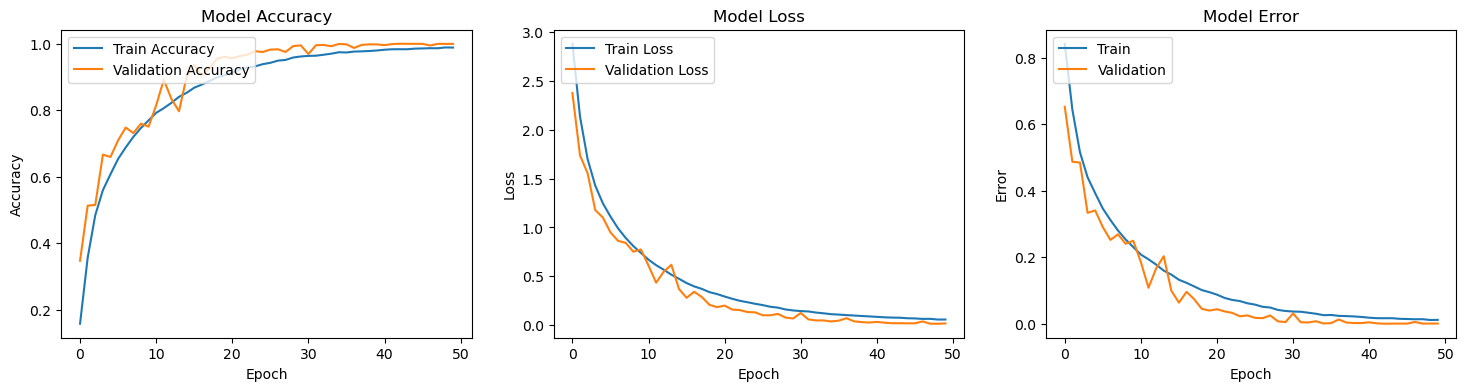

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8044 - loss: 167.9615
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 1300x1300 with 0 Axes>

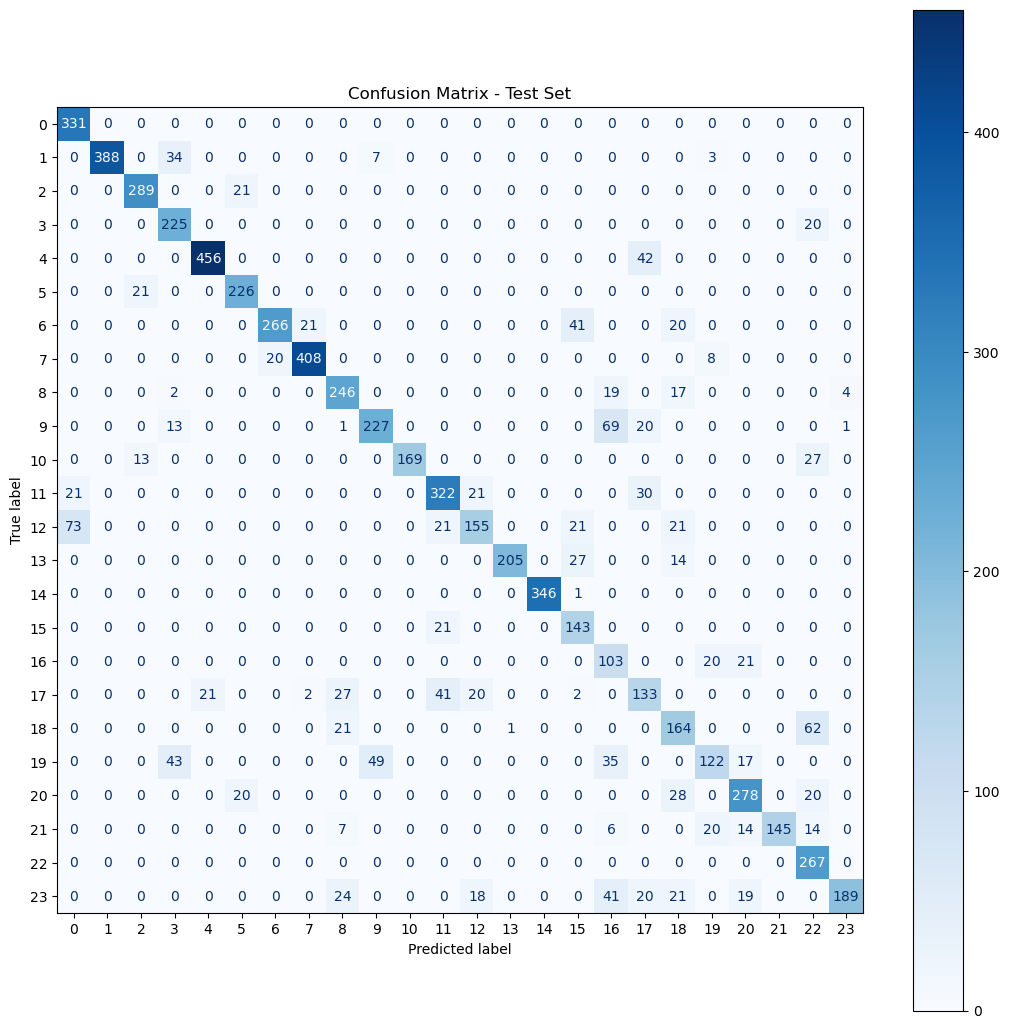

In [6]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes+1, activation='softmax'))
model.compile(optimizer=SGD(learning_rate=0.01) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
val_loss, val_accuracy = model.evaluate(X_val, y_val)
#print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

plt.figure(figsize=(18, 4))
    
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

train_error = 1 - np.array(history.history['accuracy'])
val_error = 1 - np.array(history.history['val_accuracy'])

plt.subplot(1, 3, 3)
plt.plot(train_error, label='Train Error')
plt.plot(val_error, label='Validation Error')
plt.title('Model Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('sgd2', dpi=300, bbox_inches='tight')
plt.show()

y_test = y_test.astype('int')
test_loss, test_accuracy = model.evaluate(X_test, y_test)

y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

#Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_classes)
plt.figure()
plt.rcParams['figure.figsize'] = [13, 13]
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=np.arange(24))
disp_test.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.savefig('sgd2 cm', dpi=300, bbox_inches='tight')
plt.show()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,673 (2.06 MB)

 Trainable params: 539,673 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0427 - loss: 26930.7422 - val_accuracy: 0.0399 - val_loss: 3.2978
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0426 - loss: 3.3198 - val_accuracy: 0.0463 - val_loss: 3.2863
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0386 - loss: 3.3473 - val_accuracy: 0.0381 - val_loss: 3.4464
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0383 - loss: 3.3478 - val_accuracy: 0.0441 - val_loss: 3.3298
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0413 - loss: 3.3398 - val_accuracy: 0.0368 - val_loss: 3.3290
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0371 - loss: 3.3392 - val_accuracy: 0.0402 - val_loss: 3.4111
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0397 - loss: 3.3511 - val_accuracy: 0.0402 - val_loss: 3.4479
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0394 - loss: 3.3598 - val_accuracy

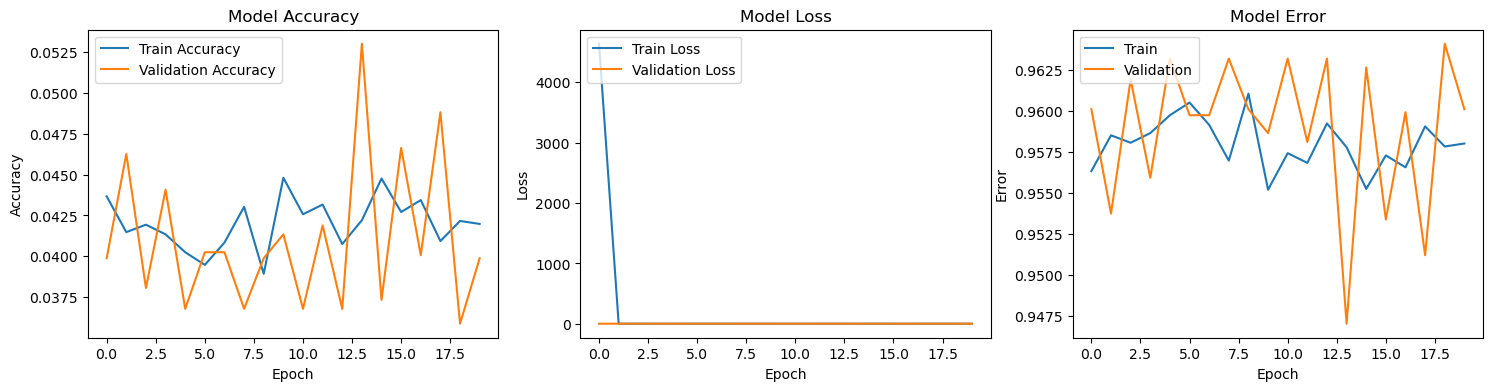

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0466 - loss: 3.4166
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 1300x1300 with 0 Axes>

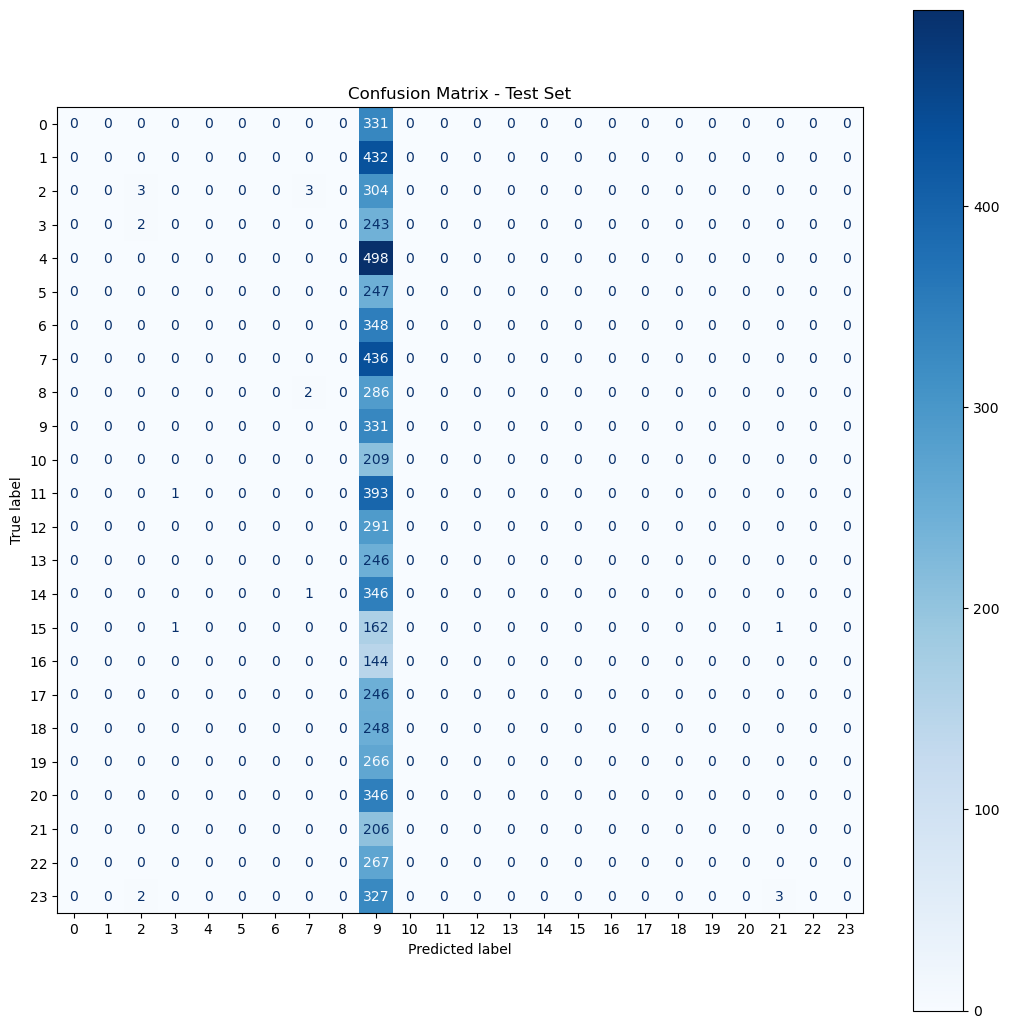

In [84]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes+1, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.9) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))
val_loss, val_accuracy = model.evaluate(X_val, y_val)
#print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

plt.figure(figsize=(18, 4))
    
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

train_error = 1 - np.array(history.history['accuracy'])
val_error = 1 - np.array(history.history['val_accuracy'])

plt.subplot(1, 3, 3)
plt.plot(train_error, label='Train Error')
plt.plot(val_error, label='Validation Error')
plt.title('Model Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('adam1', dpi=300, bbox_inches='tight')
plt.show()

y_test = y_test.astype('int')
test_loss, test_accuracy = model.evaluate(X_test, y_test)

y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

#Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_classes)
plt.figure()
plt.rcParams['figure.figsize'] = [13, 13]
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=np.arange(24))
disp_test.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.savefig('adam1 cm', dpi=300, bbox_inches='tight')
plt.show()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,673 (2.06 MB)

 Trainable params: 539,673 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1157 - loss: 4.2957 - val_accuracy: 0.3291 - val_loss: 1.9104
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4782 - loss: 1.5119 - val_accuracy: 0.5063 - val_loss: 1.4578
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6292 - loss: 1.0618 - val_accuracy: 0.7190 - val_loss: 0.7948
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7474 - loss: 0.7051 - val_accuracy: 0.8013 - val_loss: 0.5432
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8052 - loss: 0.5503 - val_accuracy: 0.8259 - val_loss: 0.4942
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8598 - loss: 0.4067 - val_accuracy: 0.8962 - val_loss: 0.2981
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8740 - loss: 0.3463 - val_accuracy: 0.8867 - val_loss: 0.3103
Epoch 8/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8765 - loss: 0.3578 - val_accu

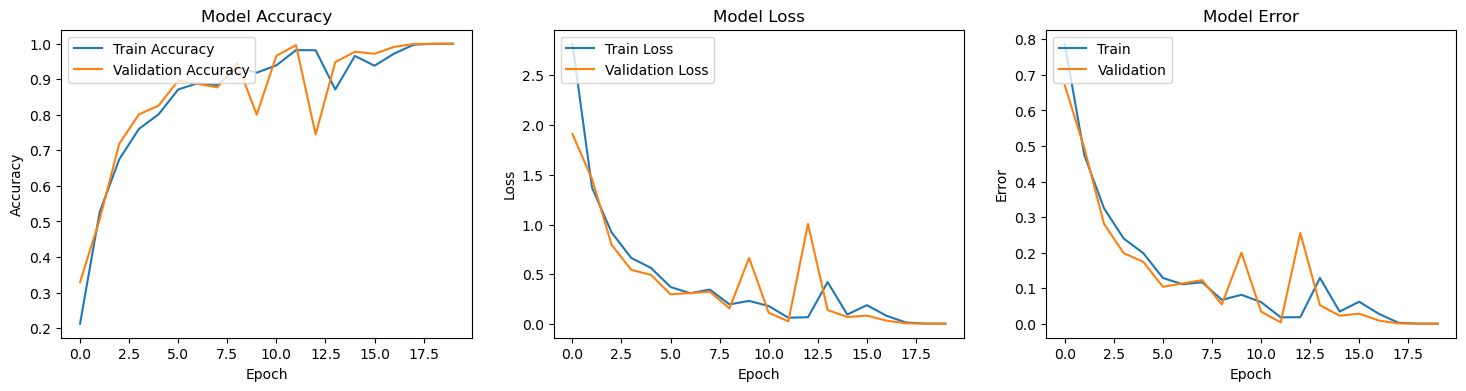

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7279 - loss: 530.2942
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 1300x1300 with 0 Axes>

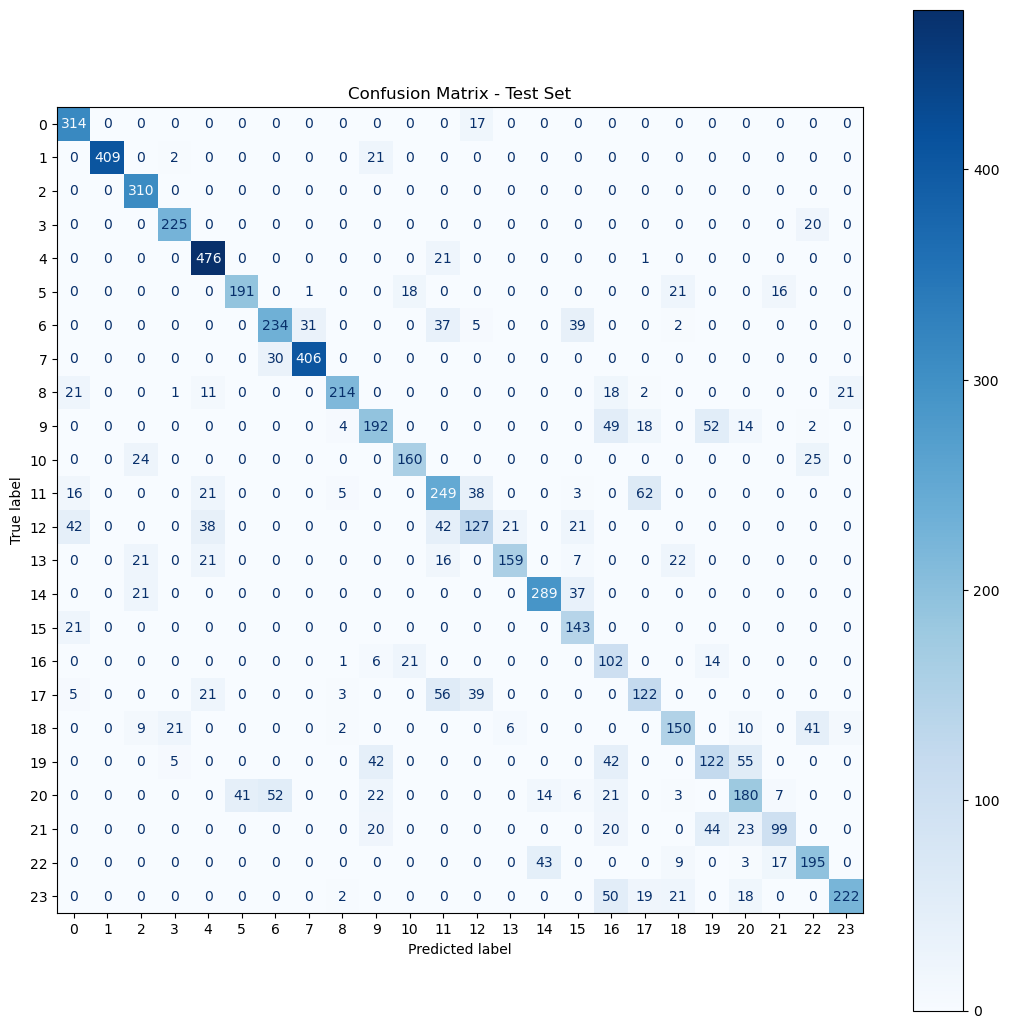

In [82]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(1e-8))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes+1, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.01) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))
val_loss, val_accuracy = model.evaluate(X_val, y_val)
#print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

plt.figure(figsize=(18, 4))
    
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

train_error = 1 - np.array(history.history['accuracy'])
val_error = 1 - np.array(history.history['val_accuracy'])

plt.subplot(1, 3, 3)
plt.plot(train_error, label='Train Error')
plt.plot(val_error, label='Validation Error')
plt.title('Model Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('adam2', dpi=300, bbox_inches='tight')
plt.show()

y_test = y_test.astype('int')
test_loss, test_accuracy = model.evaluate(X_test, y_test)

y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

#Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_classes)
plt.figure()
plt.rcParams['figure.figsize'] = [13, 13]
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=np.arange(24))
disp_test.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.savefig('adam2 cm', dpi=300, bbox_inches='tight')
plt.show()